In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd


# file_path = r"D:\simulation_results\2_layers_45_degrees_big.hdf5"
# print("File exists:", os.path.exists(file_path))

# print("Current Working Directory:", os.getcwd())

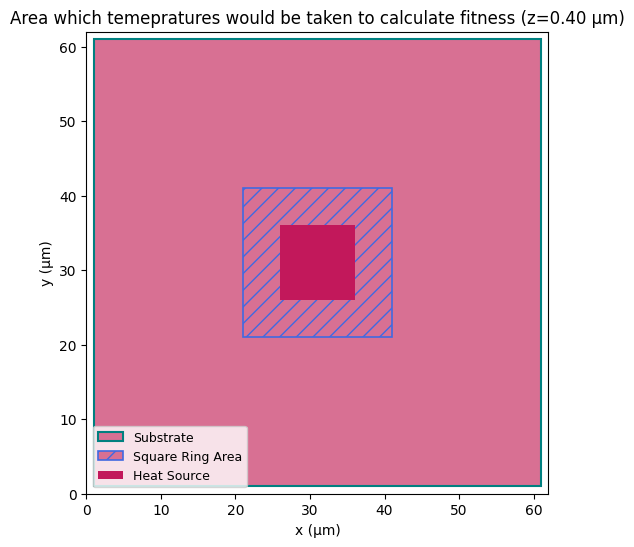

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 62)
ax.set_ylim(0, 62)
ax.set_aspect('equal')

# Center coordinates
cx, cy = 31, 31

# Substrate (60x60) - light pink
substrate = patches.Rectangle(
    (cx - 30, cy - 30), 60, 60,
    facecolor='#d87093', edgecolor='teal', linewidth=1.5, label='Substrate'
)

outer_square = patches.Rectangle(
    (cx - 10, cy - 10), 20, 20,
    facecolor='#d87093', edgecolor='#4169E1', hatch='//', linewidth=1.2, label='Square Ring Area'
)

# Inner square (solid dark pink/red)
inner_square = patches.Rectangle(
    (cx - 5, cy - 5), 10, 10,
    edgecolor=None, facecolor='#c2185b', label='Heat Source'
)

# Add shapes
ax.add_patch(substrate)
ax.add_patch(outer_square)
ax.add_patch(inner_square)


# Titles and labels
plt.title("Area which temepratures would be taken to calculate fitness (z=0.40 µm)", fontsize=12)
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
# Create a label section (legend)
handles = [substrate, outer_square, inner_square]
ax.legend(handles=handles, loc='lower left', fontsize=9, frameon=True)

plt.grid(False)
plt.show()


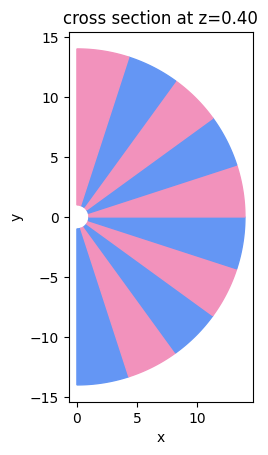

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_wedges = 10
r_inner = 1
r_outer = 14
theta = np.linspace(-np.pi/2, np.pi/2, num_wedges + 1)

# Colors sampled from your Tidy3D plot
colors = ['#6496f4', '#f292bc']  # Blue, Pink

# Create the figure and axis
fig, ax = plt.subplots()
for i in range(num_wedges):
    color = colors[i % 2]
    
    theta1 = theta[i]
    theta2 = theta[i+1]
    
    t = np.linspace(theta1, theta2, 30)
    x_outer = r_outer * np.cos(t)
    y_outer = r_outer * np.sin(t)
    x_inner = r_inner * np.cos(t[::-1])
    y_inner = r_inner * np.sin(t[::-1])
    
    x = np.concatenate([x_outer, x_inner])
    y = np.concatenate([y_outer, y_inner])
    
    ax.fill(x, y, color=color)

# Formatting
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('cross section at z=0.40')
plt.show()


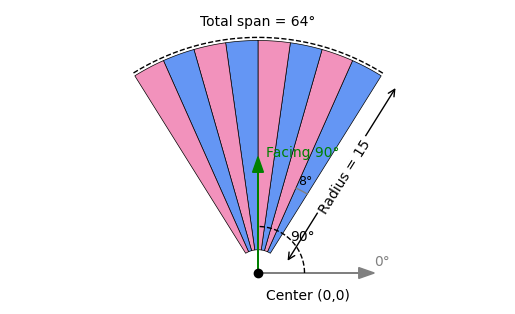

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch

# Parameters
num_wedges = 8
r_inner = 1.5
r_outer = 15
slice_span_deg = 8
total_span_deg = num_wedges * slice_span_deg
theta_span = np.deg2rad(total_span_deg)
theta_offset = np.pi / 2

# Theta bounds
theta_start = theta_offset - theta_span / 2
theta_end = theta_offset + theta_span / 2
theta = np.linspace(theta_start, theta_end, num_wedges + 1)

# Colors
colors = ['#6496f4', '#f292bc']

# Plot
fig, ax = plt.subplots()
for i in range(num_wedges):
    color = colors[i % 2]
    theta1 = theta[i]
    theta2 = theta[i + 1]
    t = np.linspace(theta1, theta2, 100)
    x_outer = r_outer * np.cos(t)
    y_outer = r_outer * np.sin(t)
    x_inner = r_inner * np.cos(t[::-1])
    y_inner = r_inner * np.sin(t[::-1])
    x = np.concatenate([x_outer, x_inner])
    y = np.concatenate([y_outer, y_inner])
    ax.fill(x, y, color=color, edgecolor='k', linewidth=0.5)

# Center
ax.plot(0, 0, 'ko')
ax.text(0.5, -1, 'Center (0,0)', ha='left', va='top')

# Facing vector
facing_x = [0, 7.5 * np.cos(theta_offset)]
facing_y = [0, 7.5 * np.sin(theta_offset)]
ax.arrow(facing_x[0], facing_y[0], facing_x[1], facing_y[1],
         head_width=0.7, head_length=1, fc='green', ec='green', length_includes_head=True)
ax.text(facing_x[1] + 0.5, facing_y[1], 'Facing 90°', color='green', fontsize=10)

# 0° vector
ax.arrow(0, 0, 7.5, 0,
         head_width=0.7, head_length=1, fc='gray', ec='gray', length_includes_head=True)
ax.text(7.5, 0.5, '0°', color='gray', fontsize=10)

# 90° arc
arc_theta_face = np.linspace(0, theta_offset, 100)
arc_radius = 3
arc_x_face = arc_radius * np.cos(arc_theta_face)
arc_y_face = arc_radius * np.sin(arc_theta_face)
ax.plot(arc_x_face, arc_y_face, 'k--', lw=1)
ax.text(arc_radius * 0.7, arc_radius * 0.7, '90°', fontsize=10)

# Total span
arc_theta = np.linspace(theta_start, theta_end, 100)
arc_x = 15.2 * np.cos(arc_theta)
arc_y = 15.2 * np.sin(arc_theta)
ax.plot(arc_x, arc_y, 'k--', lw=1)
ax.text(0, 16, f'Total span = {total_span_deg}°', ha='center', fontsize=10)

# Slice span
mid_theta = (theta[0] + theta[1]) / 2
arc_theta_slice = np.linspace(theta[0], theta[1], 30)
arc_x_slice = 6 * np.cos(arc_theta_slice)
arc_y_slice = 6 * np.sin(arc_theta_slice)
ax.plot(arc_x_slice, arc_y_slice, 'gray', lw=1)
ax.text(6.5 * np.cos(mid_theta), 6.5 * np.sin(mid_theta), f'{slice_span_deg}°', ha='center', fontsize=9)

# Radius double-arrow along leftmost wedge direction
theta_left = theta[0]
arrow_shift = 1.2
dx = arrow_shift * np.sin(theta_left)
dy = -arrow_shift * np.cos(theta_left)

# Inner and outer radius points, offset outward
x_inner = r_inner * np.cos(theta_left) + dx
y_inner = r_inner * np.sin(theta_left) + dy
x_outer = r_outer * np.cos(theta_left) + dx
y_outer = r_outer * np.sin(theta_left) + dy

arrow = FancyArrowPatch((x_inner, y_inner),
                        (x_outer, y_outer),
                        arrowstyle='<->', mutation_scale=12, color='black')
ax.add_patch(arrow)

# Label radius (offset from the line to avoid obstruction)
label_distance = 1.2
label_angle = theta_left
label_x = ((r_inner + r_outer) / 2) * np.cos(label_angle) + 1.5 * np.sin(label_angle)
label_y = ((r_inner + r_outer) / 2) * np.sin(label_angle) - 1.5 * np.cos(label_angle)

ax.text(label_x, label_y, 'Radius = 15', fontsize=10,
        rotation=np.rad2deg(theta_left), rotation_mode='anchor',
        ha='center', va='center', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"))

# Final formatting
ax.set_aspect('equal')
ax.set_xlim(-16, 16)
ax.set_ylim(-2, 17)
ax.axis('off')


plt.show()


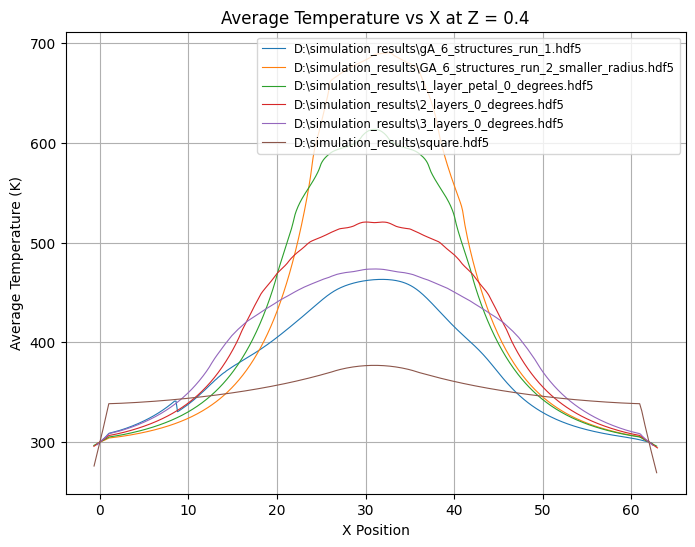

Sample data points: [('D:\\simulation_results\\gA_6_structures_run_1.hdf5', -0.32613852620124817, 297.4219), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.0, 300.0), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.16306926310062408, 301.2878), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.34561750292778015, 302.74942), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.5294833183288574, 304.27774)]


In [ ]:


# List of file paths (replace with your actual file names)
file_paths = [r"D:\simulation_results\gA_6_structures_run_1.hdf5",
              r"D:\simulation_results\GA_6_structures_run_2_smaller_radius.hdf5", 
              r"D:\simulation_results\1_layer_petal_0_degrees.hdf5", 
              r"D:\simulation_results\2_layers_0_degrees.hdf5",
              r"D:\simulation_results\3_layers_0_degrees.hdf5", 
              r"D:\simulation_results\square.hdf5"]  # Add multiple file names here

# Initialize list to store data points from all files
data_points = []

# Create a figure for plotting
plt.figure(figsize=(8, 6))

for file_path in file_paths:
    with h5py.File(file_path, "r") as hdf:
        # Load data from HDF5 file
        x_data = hdf["data/0/temperature/x"][:]  
        y_data = hdf["data/0/temperature/y"][:]  
        z_data = hdf["data/0/temperature/z"][:]  
        temperature_data = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]  # 3D array

        # Find the nearest index for z = 0.4
        z_index = np.argmin(np.abs(z_data - 0.4))  

        # Find indices for y range 10 to 50
        y_indices = np.where((y_data >= 10) & (y_data <= 50))[0]

        # Extract temperature slice at z=0.4 and average over selected y range
        temperature_slice = temperature_data[:, y_indices, z_index]  # (x, selected y)
        avg_temperature = np.mean(temperature_slice, axis=1)  # Averaging along y-axis

        # Append data to the list with filename included
        data_points.extend([(file_path, x, temp) for x, temp in zip(x_data, avg_temperature)])

        # Plot x vs. average temperature for each file on the same figure
        plt.plot(x_data, avg_temperature, linestyle="-", linewidth=0.8, label=f"{file_path}")

# Add labels, title, and legend
plt.xlabel("X Position")
plt.ylabel("Average Temperature (K)")
plt.title("Average Temperature vs X at Z = 0.4")
plt.legend(loc="upper right", fontsize="small") 
plt.grid()
plt.show()

# Print the first few data points for verification
print("Sample data points:", data_points[:5])


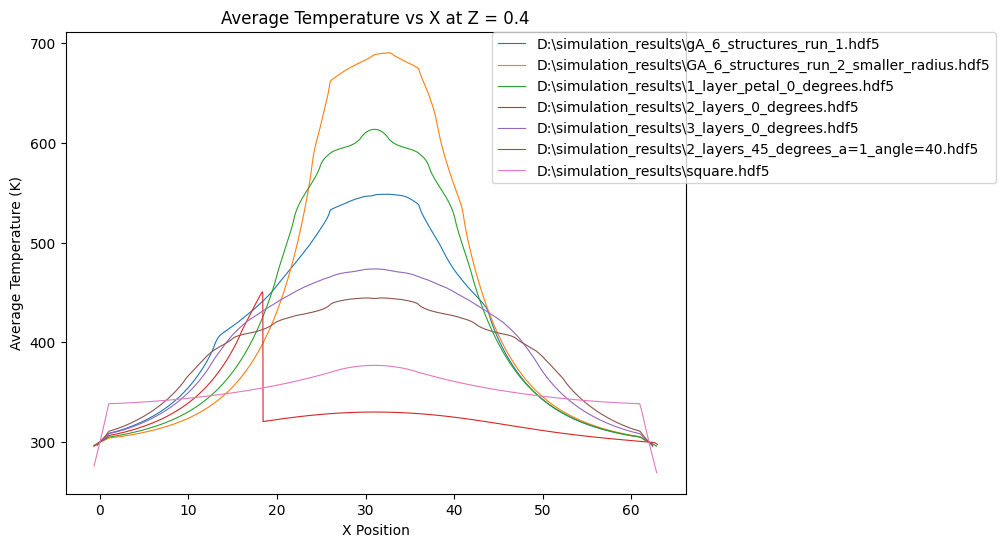

Sample data points: [('D:\\simulation_results\\gA_6_structures_run_1.hdf5', -0.32613852620124817, 297.4219), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.0, 300.0), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.16306926310062408, 301.2878), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.34561750292778015, 302.74942), ('D:\\simulation_results\\gA_6_structures_run_1.hdf5', 0.5294833183288574, 304.27774)]


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd


# List of file paths (replace with your actual file names)
file_paths = [r"D:\simulation_results\gA_6_structures_run_1.hdf5",
              r"D:\simulation_results\GA_6_structures_run_2_smaller_radius.hdf5", 
              r"D:\simulation_results\1_layer_petal_0_degrees.hdf5", 
              r"D:\simulation_results\2_layers_0_degrees.hdf5",
              r"D:\simulation_results\3_layers_0_degrees.hdf5",
              r"D:\simulation_results\2_layers_45_degrees_a=1_angle=40.hdf5",
              r"D:\simulation_results\square.hdf5"]  # Add multiple file names here

# Initialize list to store data points from all files
data_points = []

# Create a figure for plotting
fig = plt.figure(figsize=(8, 6))

for file_path in file_paths:
    with h5py.File(file_path, "r") as hdf:
        # Load data from HDF5 file
        x_data = hdf["data/0/temperature/x"][:]  
        y_data = hdf["data/0/temperature/y"][:]  
        z_data = hdf["data/0/temperature/z"][:]  
        temperature_data = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]  # 3D array

        # Find the nearest index for z = 0.4
        z_index = np.argmin(np.abs(z_data - 0.4))  

        # Find indices for y range 10 to 50
        y_indices = np.where((y_data >= 10) & (y_data <= 50))[0]

        # Extract temperature slice at z=0.4 and average over selected y range
        temperature_slice = temperature_data[:, y_indices, z_index]  # (x, selected y)
        avg_temperature = np.mean(temperature_slice, axis=1)  # Averaging along y-axis

        # Append data to the list with filename included
        data_points.extend([(file_path, x, temp) for x, temp in zip(x_data, avg_temperature)])

        # Plot x vs. average temperature for each file on the same figure
        plt.plot(x_data, avg_temperature, linestyle="-", linewidth=0.8, label=f"{file_path}")

# Add labels, title, and legend
plt.xlabel("X Position")
plt.ylabel("Average Temperature (K)")
plt.title("Average Temperature vs X at Z = 0.4")
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0.)
plt.show()

# Print the first few data points for verification
print("Sample data points:", data_points[:5])



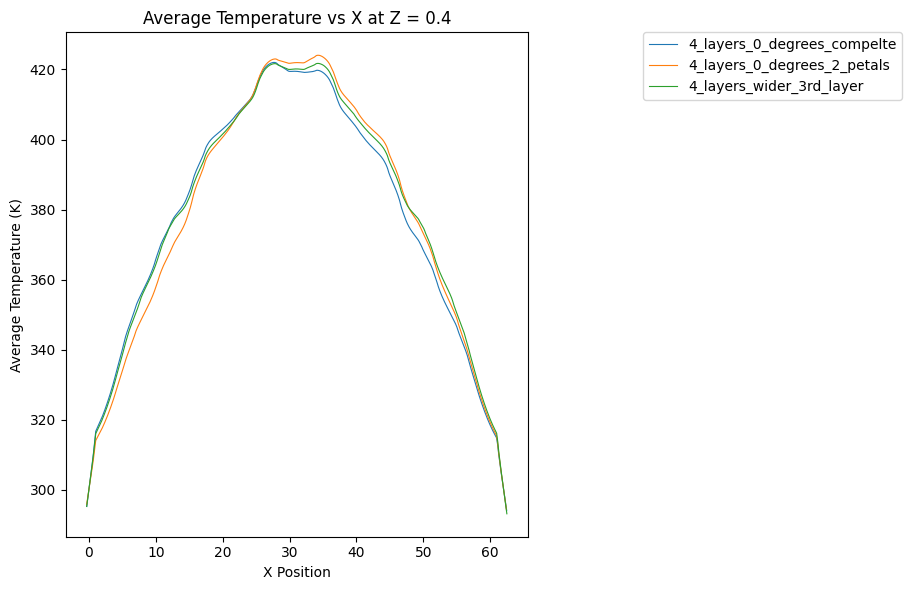

Sample data points: [('D:\\simulation_results\\4_layers_0_degrees_compelte.hdf5', -0.3222827911376953, 295.20493), ('D:\\simulation_results\\4_layers_0_degrees_compelte.hdf5', 0.0, 300.0), ('D:\\simulation_results\\4_layers_0_degrees_compelte.hdf5', 0.16114139556884766, 302.38342), ('D:\\simulation_results\\4_layers_0_degrees_compelte.hdf5', 0.34476226568222046, 305.1315), ('D:\\simulation_results\\4_layers_0_degrees_compelte.hdf5', 0.5261292457580566, 307.96008)]


In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import os

# List of file paths
file_paths = [r"D:\simulation_results\4_layers_0_degrees_compelte.hdf5",
              r"D:\simulation_results\4_layers_0_degrees_2_petals.hdf5",
              r"D:\simulation_results\4_layers_wider_3rd_layer.hdf5"
              
]

# Initialize global data_points list (if you want a combined version)
data_points = []

# Create a figure for plotting
fig = plt.figure(figsize=(10, 6))

for file_path in file_paths:
    with h5py.File(file_path, "r") as hdf:
        x_data = hdf["data/0/temperature/x"][:]
        y_data = hdf["data/0/temperature/y"][:]
        z_data = hdf["data/0/temperature/z"][:]
        temperature_data = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]

        z_index = np.argmin(np.abs(z_data - 0.4))
        y_indices = np.where((y_data >= 10) & (y_data <= 50))[0]

        temperature_slice = temperature_data[:, y_indices, z_index]
        avg_temperature = np.mean(temperature_slice, axis=1)

        # Collect data for this file
        file_data = [(x, temp) for x, temp in zip(x_data, avg_temperature)]
        data_points.extend([(file_path, x, temp) for x, temp in file_data])  # Optional: for global storage

        # Save individual file's data to CSV
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        csv_filename = f"{base_name}_data_points.csv"
        df = pd.DataFrame(file_data, columns=["x", "avg_temperature"])
        df.to_csv(csv_filename, index=False)

        # Plot
        plt.plot(x_data, avg_temperature, linestyle="-", linewidth=0.8, label=base_name)

# Final plot
plt.xlabel("X Position")
plt.ylabel("Average Temperature (K)")
plt.title("Average Temperature vs X at Z = 0.4")
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Print sample
print("Sample data points:", data_points[:5])

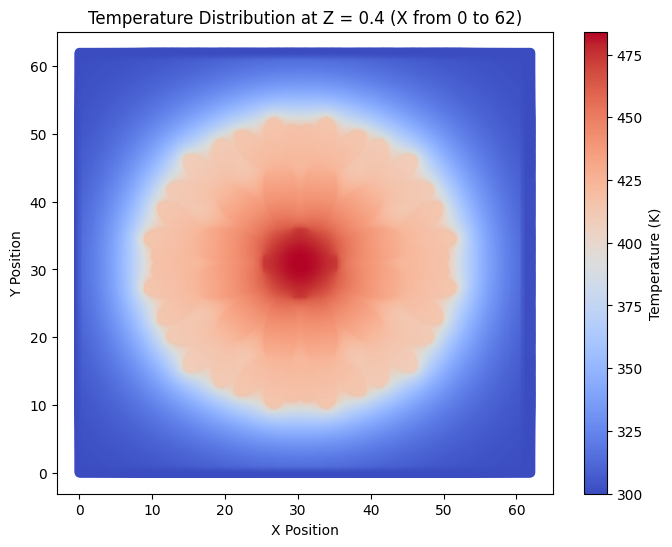

In [3]:

file_path = r"D:\simulation_results\45_degrees_2_layers_a=1.5_1.hdf5"

with h5py.File(file_path, "r") as hdf:
    # Load data from HDF5 file
    x_data = hdf["data/0/temperature/x"][:]  
    y_data = hdf["data/0/temperature/y"][:]  
    z_data = hdf["data/0/temperature/z"][:]  
    temperature_data = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]  # 3D array

    # Find the nearest index for z = 0.4
    z_index = np.argmin(np.abs(z_data - 0.4))  

    # Extract temperature slice at z=0.4
    temperature_slice = temperature_data[:, :, z_index]  # (1627, 1625) 2D array

    # Filter for x values in the range [0, 61]
    x_mask = (x_data >= 0) & (x_data <= 62)
    x_filtered = x_data[x_mask]
    
    y_mask = (y_data >= 0) & (y_data <= 62)
    y_filtered = y_data[y_mask]
    temperature_filtered_x = temperature_slice[x_mask, :]
    temperature_filtered = temperature_filtered_x[:, y_mask]
    # Create a meshgrid for filtered X and Y
    X, Y = np.meshgrid(x_filtered, y_filtered, indexing='ij')

    # Plot x-y scatter with temperature color using 'coolwarm' colormap
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X.flatten(), Y.flatten(), c=temperature_filtered.flatten(), cmap="coolwarm", marker="o")

    # Add colorbar, labels, and title
    plt.colorbar(scatter, label="Temperature (K)")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Temperature Distribution at Z = 0.4 (X from 0 to 62)")
    plt.show()



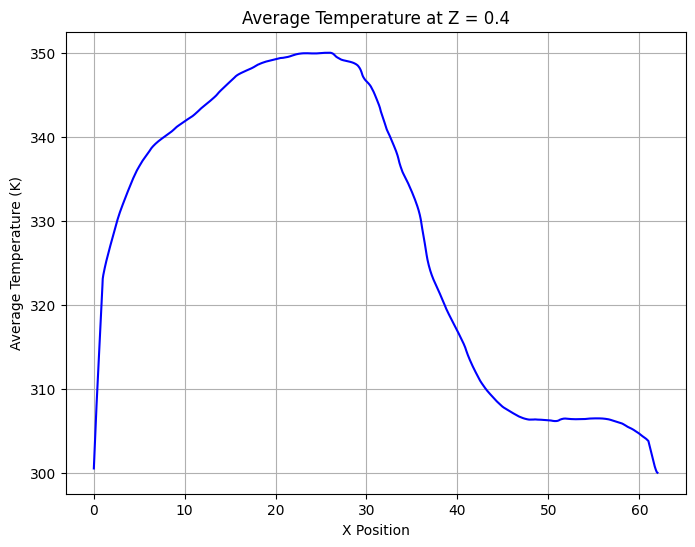

In [7]:
with h5py.File(file_path, "r") as hdf:
    # Load data from HDF5 file
    x_data = hdf["data/0/temperature/x"][:]  
    y_data = hdf["data/0/temperature/y"][:]  
    z_data = hdf["data/0/temperature/z"][:]  
    temperature_data = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]  # 3D array

    # Find the nearest index for z = 0.4
    z_index = np.argmin(np.abs(z_data - 0.4))  

    # Extract temperature slice at z=0.4
    temperature_slice = temperature_data[:, :, z_index]  # 2D array

    # Filter for x values in the range [0, 62]
    x_mask = (x_data >= 0) & (x_data <= 62)
    x_filtered = x_data[x_mask]

    # Filter for y values in the range [0, 62]
    y_mask = (y_data >= 0) & (y_data <= 62)
    
    # Apply mask to temperature data
    temperature_filtered_x = temperature_slice[x_mask, :]
    temperature_filtered = temperature_filtered_x[:, y_mask]

    # Compute the average temperature along the y-axis
    temperature_avg_y = np.mean(temperature_filtered, axis=1)

    # Plot the average temperature against x
    plt.figure(figsize=(8, 6))
    plt.plot(x_filtered, temperature_avg_y, linestyle="-", color="b")

    # Add labels and title
    plt.xlabel("X Position")
    plt.ylabel("Average Temperature (K)")
    plt.title("Average Temperature at Z = 0.4")
    plt.grid(True)
    plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_12624\1316526237.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set1')  # or 'Set1', 'Dark2', etc.


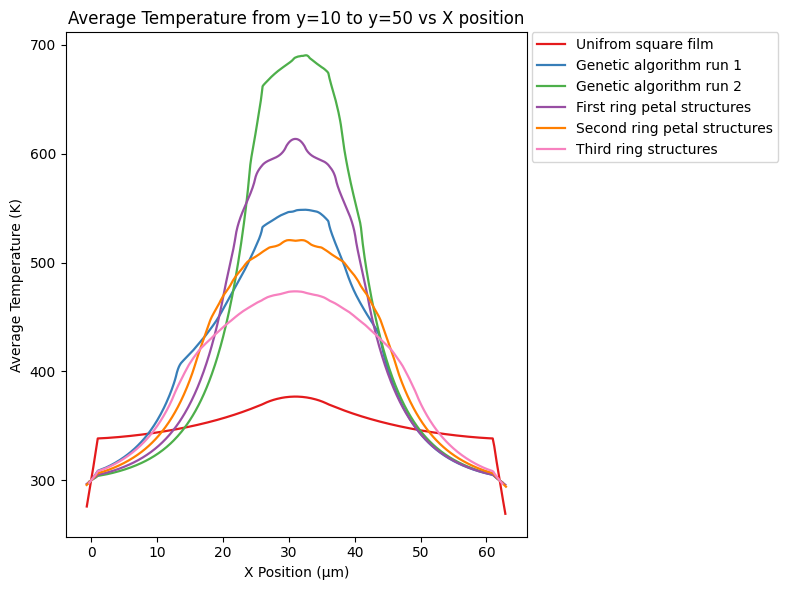

In [8]:

# List of folders you want to include
folder = r"C:\Users\A\tidy3d"
import matplotlib.cm as cm

colormap = cm.get_cmap('Set1')  # or 'Set1', 'Dark2', etc.

# Define fixed colors for specific folders
filename_info = {
    "square_data_points": {
        "color": colormap(0),
        "name": "Unifrom square film"
    },
    "gA_6_structures_run_1_data_points": {
        "color": colormap(1),
        "name": "Genetic algorithm run 1"
    },
    "GA_6_structures_run_2_smaller_radius_data_points": {
        "color" : colormap(2),
        "name" : "Genetic algorithm run 2"
    },
    "1_layer_petal_0_degrees_data_points": {
        "color": colormap(3),
        "name": "First ring petal structures"
    },
    "2_layers_0_degrees_data_points": {
        "color" : colormap(4),
        "name" : "Second ring petal structures"
    },
    # "45_degrees_2_layers_a=1.5_1_data_points":{
    #     "color" : colormap(6),
    #     "name" : "2 Layers with bigger structures"
    # },
    "3_layers_0_degrees_data_points":{
        "color" : colormap(7),
        "name" : "Third ring structures"
    },
    # "4_layers_0_degrees_compelte_data_points":{
    #     "color" : colormap(6),
    #     "name" : "4 layers smaller structures"
    # },
    # "4_layers_wider_3rd_layer_data_points":{
    #     "color" : colormap(7),
    #     "name" : "4 layers with wider 3rd layer"
    # }
}

plt.figure(figsize=(8, 6))

for base_name, info in filename_info.items():
    file_path = os.path.join(folder, f"{base_name}.csv")
    
    if not os.path.isfile(file_path):
        print(f"⚠️ Skipping missing file: {file_path}")
        continue

    df = pd.read_csv(file_path)
    plt.plot(df["x"], df["avg_temperature"], label=info["name"], linewidth=1.6, color=info["color"])

# Plot formatting
plt.xlabel("X Position (µm)")
plt.ylabel("Average Temperature (K)")
plt.title("Average Temperature from y=10 to y=50 vs X position")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [4]:


file_paths = [
              r"D:\simulation_results\2_layers_45_degrees_a=1_angle=40.hdf5"
              ]

for file_path in file_paths:
    with h5py.File(file_path, "r") as hdf:
        x = hdf["data/0/temperature/x"][:]  
        y = hdf["data/0/temperature/y"][:]  
        z = hdf["data/0/temperature/z"][:]  
        temp = hdf["data/0/temperature/__xarray_dataarray_variable__"][:]  # (x, y, z)

        avg_temp = np.mean(temp)

        # Use scalar spacing if uniform
        dx = x[1] - x[0]
        dy = y[1] - y[0]
        dz = z[1] - z[0]

        grad_x, grad_y, grad_z = np.gradient(temp, dx, dy, dz)
        grad_mag = np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        avg_grad_mag = np.mean(grad_mag)

        print(f"\nFile: {file_path}")
        print(f"  - Avg temperature: {avg_temp:.3f} K")
        print(f"  - Avg gradient magnitude: {avg_grad_mag:.5f} K/unit")



File: D:\simulation_results\2_layers_45_degrees_a=1_angle=40.hdf5
  - Avg temperature: 359.984 K
  - Avg gradient magnitude: 3.06143 K/unit


C:\Users\A\AppData\Local\Temp\ipykernel_9700\2582141263.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Set1')


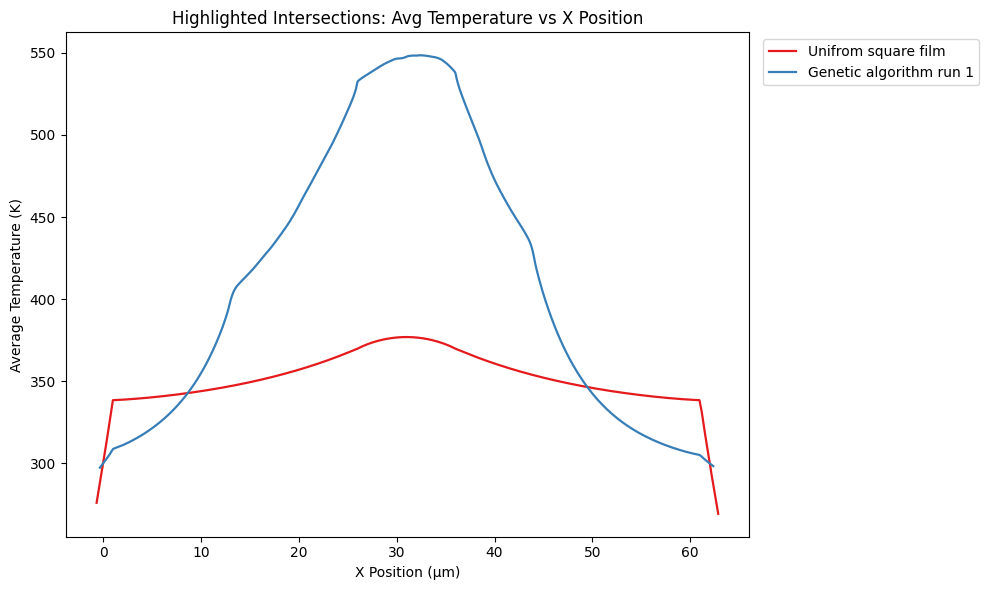

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

folder = r"C:\Users\A\tidy3d"
colormap = cm.get_cmap('Set1')

filename_info = {
    "square_data_points": {
        "color": colormap(0),
        "name": "Unifrom square film"
    },
    "gA_6_structures_run_1_data_points": {
        "color": colormap(1),
        "name": "Genetic algorithm run 1"
    },
  
}

plt.figure(figsize=(10, 6))
data = {}

# Read all files and plot
for base_name, info in filename_info.items():
    file_path = os.path.join(folder, f"{base_name}.csv")
    if not os.path.isfile(file_path):
        print(f"⚠️ Skipping missing file: {file_path}")
        continue

    df = pd.read_csv(file_path)
    data[base_name] = df
    plt.plot(df["x"], df["avg_temperature"], label=info["name"], linewidth=1.6, color=info["color"])

# Overlay intersection highlights
keys = list(data.keys())
for i in range(len(keys)):
    for j in range(i + 1, len(keys)):
        df1 = data[keys[i]]
        df2 = data[keys[j]]

        # Create common x-grid
        common_x = np.linspace(max(df1["x"].min(), df2["x"].min()), 
                               min(df1["x"].max(), df2["x"].max()), 500)

        y1 = np.interp(common_x, df1["x"], df1["avg_temperature"])
        y2 = np.interp(common_x, df2["x"], df2["avg_temperature"])

        # Identify crossing zones (where y1 is above y2 and vice versa)
        crossing = np.where(np.diff(np.sign(y1 - y2)))[0]
        for idx in crossing:
            plt.fill_between(common_x[idx:idx+2], y1[idx:idx+2], y2[idx:idx+2],
                             color='yellow', alpha=0.3, zorder=0)

# Final formatting
plt.xlabel("X Position (µm)")
plt.ylabel("Average Temperature (K)")
plt.title("Highlighted Intersections: Avg Temperature vs X Position")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()
